# Projeto Data Science

## Introdução

Um simulador operacional de satélite é utilizado em apoio às atividades de operação durante uma missão espacial.  Este tipo de simulador deve desempenhar as seguintes funções [1]:

 - Validar os procedimentos de voo;
 - Treinar a equipe de operação;
 - Fornecer suporte na resolução de falhas.

No INPE diversos simuladores operacionais já foram desenvolvidos [2]. A versão mais atual foi lançada em setembro de 2017 e está configurada para o satélite CBERS-4. Nesta versão estão implementados todos os subsistemas do satélite CBERS-4, conforme a Figura 1.

![Figura1: Caracterísitcas SimCBERS.](https://lh3.googleusercontent.com/jRMLjZU6PLNXd4GGQOjdYkI3JTIVqfINp1yNAMGZW29ynIp31WlOxmJaTSxGWCA-kpQMYAYN6v_Cme-N1Fxzv88R8iqy1Rdh9KHJ-0lpaKITbwEgmz-02NsP76e2Klt5qE8S9HrAZtKm4rQvQd1vZf2oyziVA1S-OcAKp5iUFpSj4qmMGzwojce7fL8cDmfT8KoR6qZWycRF2UmUPmJApD86of8IC2DykaTAJMtZuWRBuRcpea1Ymr1tvsLcqvYV-HyDsosX5paXwLZYKgbKUYC203nRlNIe2GXZNuP1Tb4BikjiKItDokS1mZBiF63riVGh0F9-Y94qxnGG_nR1eExbRn5JhAglZwCSwK4S5KDMAOLa3jBfmw6FUyf2uJWSAp5kTNOBgvGg43JDGeSPgmH31cfdSXNImFcnCx6i6PAr5L3ymKQPSFyoZdTylBmXLBJNQBpXndCzMuKnW7kLiWNi30R8tBilmal70HFpOH-JGYva2XN-Ena7eNns0I-coFKmr8evb4mBp6cnXQWiSCl6Lugu_cG6zjcMAYIa8hTjAORqISU1-nLRNIkTn9OtGeYs65ywHzxU636brrpLjijkGjTo4N73G3EZZfOwtCg5iSeZPxJSug9ZeaurI9dq=w720-h758-no)
Figura1: Caracterísitcas SimCBERS.


## Projeto da Disciplina

Conforme citado anteriormente, o simulador operacional é uma ferramenta de apoio à equipe de controle e operação do satélite. Dessa maneira, espera-se que os modelos executados pelo simulador tenham o compromisso com:

 1. a fidelidade em relação ao satélite em voo, isto é, quanto menor a diferença entre os resultados do modelo simulado e o dados de voo, melhor para a equipe de operação. [3]
 2. requisitos de tempo. [4]

Nesse sentido, de modo a obter modelos mais fieis para serem implementados no contexto do simulador operacional, foram exploradas técnicas de identificação. A identificação do tipo caixa-preta se baseia na obtenção de um modelo que representa o sistema, a partir de dados de entrada e saída obtidos a partir de observações realizadas.

Foram utilizadas três técnicas de identificação, sendo elas, n4sid (Numerical algorithms for Subspace State Space System IDentification), MOESP (Multivariable Output Error State Space) e (CVA Canonical Variate Analysis) [5]. Os três métodos estimam as matrizes (A, B, C e D) que descrevem o sistema em espaço de estados, como pode ser observado na equação: 
 
 
 $\dot{x}(t) = Ax(t) + Bu(t)\\
y(t) = Cx(t) + Du(t)$


Para validar os modelos identificados, utilizou o indicador de desempenho denominado média relativa do erro quadrático (MRSE), dado pela seguinte equação:

$MRSE(\%)=   
\frac{1}{no} \sum_{q=1}^{no}\left [\sqrt{\frac{\sum _{t=1}^{val}(y_{q}(t)-\hat{y}_{q}(t)^{2})}{\sum _{t=1}^{val}y_{q}(t)^{2}}}  \right ]*100$

No $MRSE(\%)$ quanto mais próximo de zero for o resuldao, melhor.

Como este é um trablaho exploratório, serão considerados bons os modelos cujo o índice, após a identificação, apresente erro menor que o modelo implementado atualmente no simulador.

Para tanto, destaca-se o $MRSE(\%)$ de uma simulação com 1862 amostras de alguns parâmetros:

|                              Parâmetro                     |      Símbolo       |        $MRSE(\%)$          |
|------------------------------------------------------------|--------------------|----------------------------|
| Corrente da Bateria 1                                      |      $I_{BAT1}$    |53.68306                    |
| Tensão da Bateria 1                                        |      $V_{BAT1}$    |2.7225516                   |
| Tensão do amplificador                                     |      $V_{MEA}$     |$* $                        |
| Corrente de saída do controlador de descarga da bateria    |   $I_{BDR_{OUT}}$  |21.518                      |

$*$ O parâmetro $V_{MEA}$ não é simulado na versão atual do simulador.

# Identificação do $I_{BDR_{OUT}}$


## Passo1: Importação dos Dados

![Figura: Obtenção e tratamento dos dados.](https://lh3.googleusercontent.com/HGToT5uKNDaTLE-foSqdt5ieLubWFXSO1FWpLXNHDqJXf-wrWDMBGF85uINWl_wEQVBxnAkkr0g_c2v8rB7aGtUZrLK19IPpbCUFld2vn573HqvyfPu-HrwolDX6QbXA06C7_xaqJK3yGyw5ZxTitzBbteBazJcEIVIo9d8zvfv8L0PlScVAYN7UtEzMnjMCpm84mipCxxBBNxdGmhGv0RwZFqpa28tqpRSyfnxkGdYF6YL3j3V4GIeLVv2zfyT_zsm1cFJymlT4OWnEzl9hHKK62IRkI119uduqD1eVfEpSNO9CGGSIRPgOYtDbVc-Sb5BmRAllQ0qA7vevpNQA7xergJvdQb_qdGerJAbtBZt_vhD_QLSf0FPAqYffGc1iCeBm45uT8ZqS8Qid4wH31Poj7qkDGMaDkJJEpJVwiwf8_hSCRgWys10PUA7hB91T2dBPrq1aOoT9q6WJKxIeCJa44gB9HRokSPUWjxUFftsVnfQFXP2THZBedLaePvfer7nFJIJiIKG9zis9rUy6eIol_OaKwtMFupg7A23rcW8ys4QZC0oYlFPVEq6D3DNaODMeJL65yBYcnOEZHprXbJRBM2P1kJNDYKPDzd5uRDNsmM3OjyUPxu7sENGlSno6=w1224-h549-no)



In [48]:
from __future__ import division
from past.utils import old_div

import pandas as pd
import numpy as np
from numpy import long
from numpy import float32
from numpy import int64
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error
from math import sqrt

#Checking path to access other files
try:
    from SIPPY import *
except ImportError:
    import sys, os
    sys.path.append(os.pardir)
    from SIPPY import *

import control as cnt
from control import matlab
from SIPPY import functionset as fset
from SIPPY import functionsetSIM as fsetSIM

##o TRECHO ABAIXO FOI COMENTADO PORQUE O ARQUIVO ORIGINAL TINHA >600 MB E NÃO SERIA POSSÍVEL CARREGA-LO.
##Indicando o nome do arquivo
#file = 'Telemetry.csv'

##Importando o arquivo para o Workspace
#raw_data = pd.read_csv(file);

##Substituindo o valor "NAO PROCESSADO" por NaN
#raw_data2 = raw_data.replace(to_replace="NAO PROCESSADO",value=np.nan);


#Selecionando as colunas de interesse
#raw_data3 = raw_data2.iloc[:,0:11+1]
#raw_data4 = raw_data2.iloc[:,21:28+1]
#raw_data5 = raw_data2.iloc[:,188:190+1]
#raw_data6 = pd.concat([raw_data3,raw_data4,raw_data5],axis=1)

##Indicando o nome do arquivo
file = 'Telemetry2.csv'

##Importando o arquivo para o Workspace
raw_data = pd.read_csv(file,sep=';');

##Substituindo o valor "NAO PROCESSADO" por NaN
raw_data2 = raw_data.replace(to_replace="NAO PROCESSADO",value=np.nan);


##Removendo as linhas com NaN
tide_data = raw_data2.dropna()

## Removendo o cabeçalho
tide_data2 = tide_data.drop(tide_data.index[[0,1]])

##Selecionando os parâmetros
VBus = (tide_data2.iloc[:,1])
IBus = (tide_data2.iloc[:,2])
ISG2 = (tide_data2.iloc[:,3])
VMEA = (tide_data2.iloc[:,4])
IBat1 = (tide_data2.iloc[:,5])
IBat2 = (tide_data2.iloc[:,6])
IBDR1_in = (tide_data2.iloc[:,7])
IBDR2_in = (tide_data2.iloc[:,8])
IBDR_out = (tide_data2.iloc[:,9])
ISG1A = (tide_data2.iloc[:,10])
ISG1B = (tide_data2.iloc[:,11])
VBat1 = (tide_data2.iloc[:,12])
VBat2 = (tide_data2.iloc[:,13])
VBat1_3cell = (tide_data2.iloc[:,14])
VBat2_3cell = (tide_data2.iloc[:,15])
TBat1 = (tide_data2.iloc[:,16])
TBat2 = (tide_data2.iloc[:,17])
ISG1A_to_BDR = (tide_data2.iloc[:,18])
ISG1B_to_BDR = (tide_data2.iloc[:,19])
IBus2 = (tide_data2.iloc[:,20])
IHeater1 = (tide_data2.iloc[:,21])
IHeater2 = (tide_data2.iloc[:,22])

VBus = pd.to_numeric(VBus)
IBus = pd.to_numeric(IBus)
ISG2 = pd.to_numeric(ISG2)
VMEA = pd.to_numeric(VMEA)
IBat1 = pd.to_numeric(IBat1)
IBat2 = pd.to_numeric(IBat2)
IBDR1_in = pd.to_numeric(IBDR1_in)
IBDR2_in = pd.to_numeric(IBDR2_in)
IBDR_out = pd.to_numeric(IBDR_out)
ISG1A = pd.to_numeric(ISG1A)
ISG1B = pd.to_numeric(ISG1B)
VBat1 = pd.to_numeric(VBat1)
VBat2 = pd.to_numeric(VBat2)
VBat1_3cell = pd.to_numeric(VBat1_3cell)
VBat2_3cell = pd.to_numeric(VBat2_3cell)
TBat1 = pd.to_numeric(TBat1)
TBat2 = pd.to_numeric(TBat2)
ISG1A_to_BDR = pd.to_numeric(ISG1A_to_BDR)
ISG1B_to_BDR = pd.to_numeric(ISG1B_to_BDR)
IBus2 = pd.to_numeric(IBus2)
IHeater1 = pd.to_numeric(IHeater1)
IHeater2 = pd.to_numeric(IHeater2)

C:\Users\italo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Passo 2: Slecionando as Entradas e Saídas e Fazendo a Identificação

![Figura exploração](https://lh3.googleusercontent.com/aK4X8hLE3QddFobwfIZBCz4DY7wFWJLmkXsE54Ny5zKYIv0BMJNJjurFq-F4p_oLRNdZ3npmik53NB1hUBwzQKLqlpYCCjuLTbciA99bvzzpzqA7EvrG6OijpfDaNkBogjP02Deovtba82GjSSh7R77lnF22CyT1LzVM8c2yXUiMOjujThWVfEAkKt9G_QgeDUqA701G3eYW9BamdF8JrHZ2jKtPXbY5oUPcnRDQkh_EhoPwYdUKdn-87v-7IGY9y1Ibhr5pwj8ni3M45Jkcvp4BdH7Wmj3--eN-vjvOC8oZN6-EGfy50k8ti1xkIJIeHOYhkurGrstdfnxePy3P0K6T0JqdPdxkjuZV7-Wk9a7aFEhY6LUlhE9-Qu_gRARJdf3EifrMto1XoBlg661VtP78LLNHKzrsuD7KqQMdRQcdMA2t1UACjUB_6KXzN83RpEWxT63cV0OF-N-Q1dDOeRb5SONwnx7ietXMInYWch9ruxOejoyPo9NTwzwvHGB-A0f5F2uhzso7Jv3ruFHJ5DLNWfAweX5gTE2IMUzxPCnSvkRsk2TCswzsuU8wC5hlo_rSq_bUfJQi9zQ6lfRVPg_ronrHza8xBDx6pIylsV3vq5u0p7ABR8YFygtFM0XW=w1231-h549-no)

Kalman filter cannot be calculated


<Figure size 432x288 with 0 Axes>

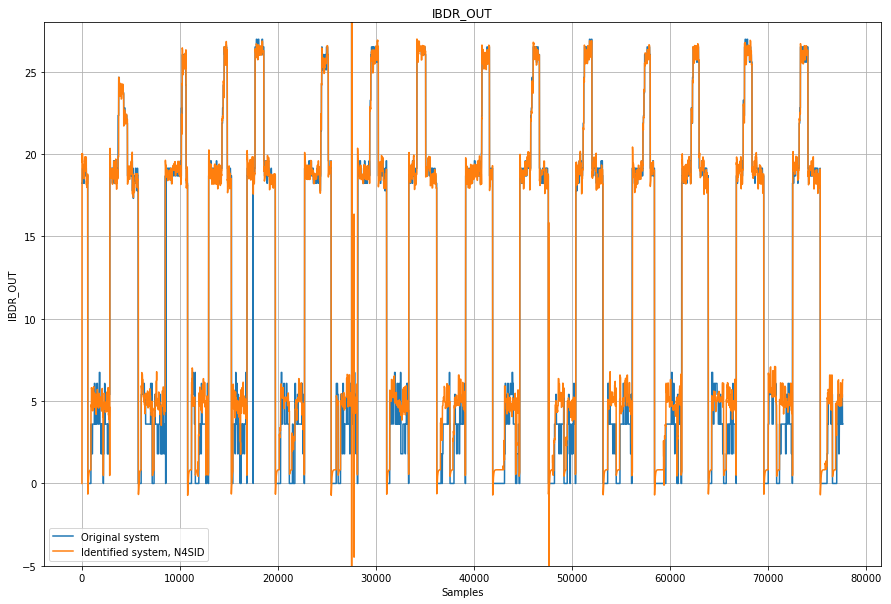

In [49]:
#Definindo tamanho da amostra para a identificação
tamanho = len(VBus)
amostras_ident = round(tamanho/35)

##Definindo amostras para identificação
IBDR1_in_ident = IBDR1_in[1:amostras_ident]
IBDR2_in_ident = IBDR2_in[1:amostras_ident]
IBDR_out_ident = IBDR_out[1:amostras_ident]

IBDR1_in_ident = pd.to_numeric(IBDR1_in_ident)
IBDR2_in_ident = pd.to_numeric(IBDR2_in_ident)
IBDR_out_ident = pd.to_numeric(IBDR_out_ident)

#Definindo amotras para para validação
IBDR1_in_val = IBDR1_in[amostras_ident+1:tamanho]
IBDR2_in_val = IBDR2_in[amostras_ident+1:tamanho]
IBDR_out_val = IBDR_out[amostras_ident+1:tamanho]

u1_val = pd.concat([IBDR1_in_val,IBDR2_in_val],axis=1)
u1_val = u1_val.values
u1_val = u1_val.transpose()

y1_val = IBDR_out_val.values
y1_val = y1_val.transpose()

##Definindo as Entradas
u1 = pd.concat([IBDR1_in_ident,IBDR2_in_ident],axis=1)
u1 = u1.values

##Definindo as Saídas
y1 = pd.concat([IBDR_out_ident])
y1 = y1.values


##Método de Identificação
method = 'N4SID'
##Identificação
sys_id=system_identification(y1,u1,method,SS_fixed_order=6)
xid,yid=fsetSIM.SS_lsim_process_form(sys_id.A,sys_id.B,sys_id.C,sys_id.D,u1_val,sys_id.x0)

plt.close("all")
plt.figure(1)
plt.figure(figsize=(15,10))
plt.plot(y1_val)
plt.plot(yid[0])
plt.ylabel("IBDR_OUT")
plt.ylim((-5,28))
plt.grid()
plt.xlabel("Samples")
plt.title("IBDR_OUT")
plt.legend(['Original system','Identified system, '+method])

## Cálculo do erro
y_calc = yid.transpose()
y1_val2 = pd.DataFrame(y1_val)
y_calc = pd.DataFrame(y_calc)
dif = (y1_val2-y_calc).values
MRSE_n4sid = (sqrt((sum((dif)**2))/(sum((y1_val)**2))))*100

Kalman filter cannot be calculated


<Figure size 432x288 with 0 Axes>

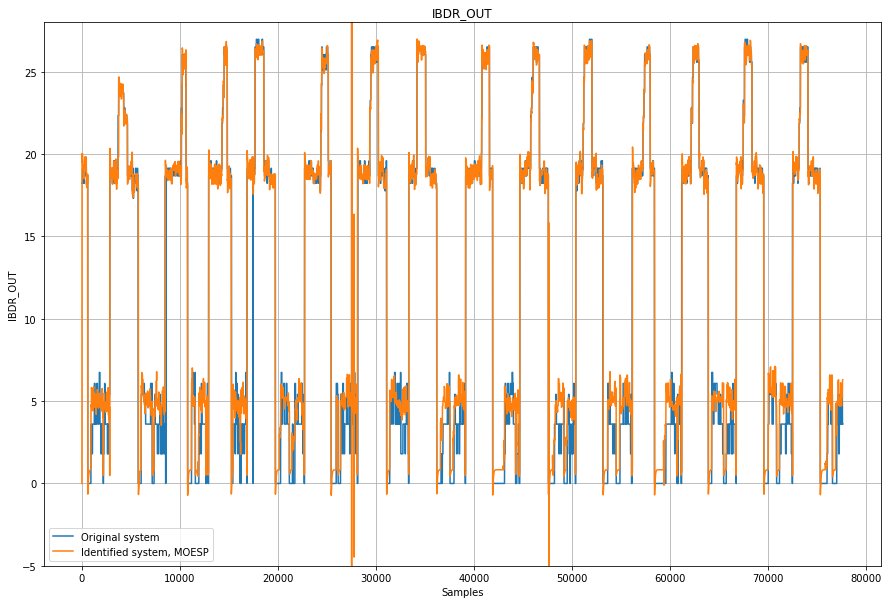

In [50]:
##Método de Identificação
method2 = 'MOESP'
##Identificação
sys_id2=system_identification(y1,u1,method2,SS_fixed_order=6)
xid2,yid2=fsetSIM.SS_lsim_process_form(sys_id2.A,sys_id2.B,sys_id2.C,sys_id2.D,u1_val,sys_id2.x0)

plt.figure(2)
plt.figure(figsize=(15,10))
plt.plot(y1_val)
plt.plot(yid2[0])
plt.ylabel("IBDR_OUT")
plt.ylim((-5,28))
plt.grid()
plt.xlabel("Samples")
plt.title("IBDR_OUT")
plt.legend(['Original system','Identified system, '+method2])

## Cálculo do erro
y_calc = yid2.transpose()
y1_val2 = pd.DataFrame(y1_val)
y_calc = pd.DataFrame(y_calc)
dif = (y1_val2-y_calc).values
MRSE_moesp = (sqrt((sum((dif)**2))/(sum((y1_val)**2))))*100

Kalman filter cannot be calculated


<Figure size 432x288 with 0 Axes>

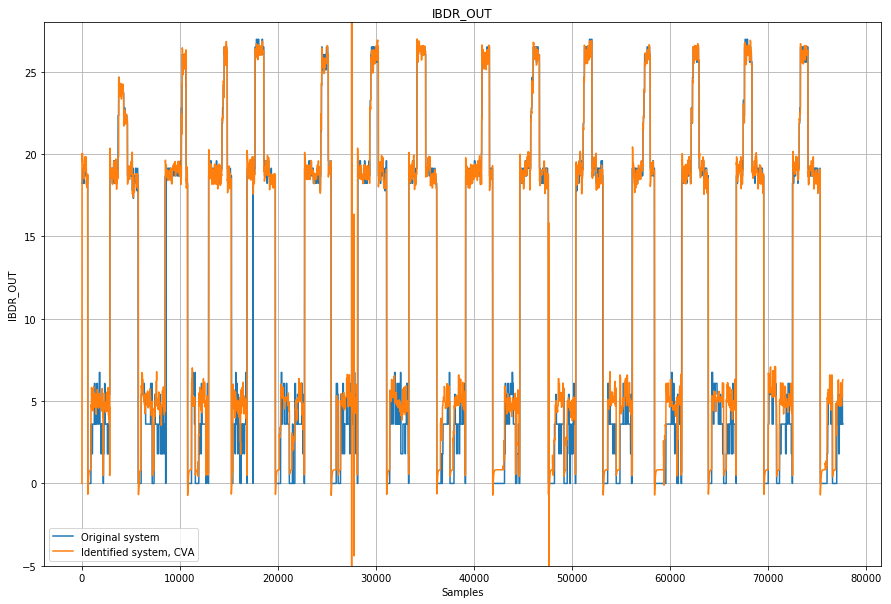

In [51]:
##Método de Identificação
method3 = 'CVA'
##Identificação
sys_id3=system_identification(y1,u1,method3,SS_fixed_order=6)
xid3,yid3=fsetSIM.SS_lsim_process_form(sys_id3.A,sys_id3.B,sys_id3.C,sys_id3.D,u1_val,sys_id3.x0)

plt.figure(3)
plt.figure(figsize=(15,10))
plt.plot(y1_val)
plt.plot(yid3[0])
plt.ylabel("IBDR_OUT")
plt.ylim((-5,28))
plt.grid()
plt.xlabel("Samples")
plt.title("IBDR_OUT")
plt.legend(['Original system','Identified system, '+method3])

## Cálculo do erro
y_calc = yid3.transpose()
y1_val2 = pd.DataFrame(y1_val)
y_calc = pd.DataFrame(y_calc)
dif = (y1_val2-y_calc).values
MRSE_cva = (sqrt((sum((dif)**2))/(sum((y1_val)**2))))*100

MRSE_IBDR_OUT = [MRSE_n4sid,MRSE_moesp,MRSE_cva]

In [52]:
MRSE_IBDR_OUT


[11.964266842172647, 11.963804691375433, 11.967429190860193]

In [53]:
min(MRSE_IBDR_OUT)

11.963804691375433

## Resultado

![Figura resultado](https://lh3.googleusercontent.com/h4XbZb1gU3Sjxxc7Y-BL3f4pV2wovtTP4lTcZZU2WkKYKltCVUeND2aXDgBg5YqCE0DvYE8IBJVVSN1a3RYPvYlAM-wJmltKn1BTJJ5ySYMyHtjGm6xQUtnYVpXFesMu6VsHNm3va5ZVM80ZZYZ6uOODOKkIg39BunHDv-bt4mJCfrcivvEFydLDNs17VcKCP4plKUm2R2CTg6lhxyMzLIwFivSUwjZ2rAF8fnsyD9LpDgcV6VWIae7-uEOYOexOq53gD9q3fRD6L9fI-zCK0Fk4wVTee1g0bMJRZ9ji9LdUpuSEJ3ookPJM92NeefyAviW0qB2QV738nTW8JQ94QEyonpnwPM6LwyKTC3VT9Sjt6TbnptLA4g8DY0blEQ5n0gfvBNVR1QcMYhYHkCkU_JEziK-kbzkuI02tkZ6BztnkiGJcqTDtvxwFa46YZAkjwfDBOhAU643E9k69OjOidDhZEnPDI0H7hxU6-Un2I_yjbDAgTdh0KMmWkvPM38DPhubGz-3idQSadVSASrwUkgOMu75TANYaNP5MIC9-az__03HLTqMg8DCQCjJZ8pBzaE08O1-wxE9dzpI5I331oJ6f8wnDqqlGGDm-0emXVDp-gsu5be4Dnov_wKUcG6mD=w1224-h550-no)

Para o caso do $I_{BDR_{OUT}}$ o modelo que apresentou o menor erro foi o obtido a partir do método MOESP.

# Identificação do $V_{MEA}$


## Passo1: Importação dos Dados

In [54]:
from __future__ import division
from past.utils import old_div

import pandas as pd
import numpy as np
from numpy import long
from numpy import float32
from numpy import int64
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from math import sqrt

#Checking path to access other files
try:
    from SIPPY import *
except ImportError:
    import sys, os
    sys.path.append(os.pardir)
    from SIPPY import *

import control as cnt
from control import matlab
from SIPPY import functionset as fset
from SIPPY import functionsetSIM as fsetSIM

##Indicando o nome do arquivo
file = 'Telemetry2.csv'

##Importando o arquivo para o Workspace
raw_data = pd.read_csv(file,sep=';');

##Substituindo o valor "NAO PROCESSADO" por NaN
raw_data2 = raw_data.replace(to_replace="NAO PROCESSADO",value=np.nan);


##Removendo as linhas com NaN
tide_data = raw_data2.dropna()

## Removendo o cabeçalho
tide_data2 = tide_data.drop(tide_data.index[[0,1]])

C:\Users\italo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Passo 2: Slecionando as Entradas e Saídas e Fazendo a Identificação

Kalman filter cannot be calculated


<Figure size 432x288 with 0 Axes>

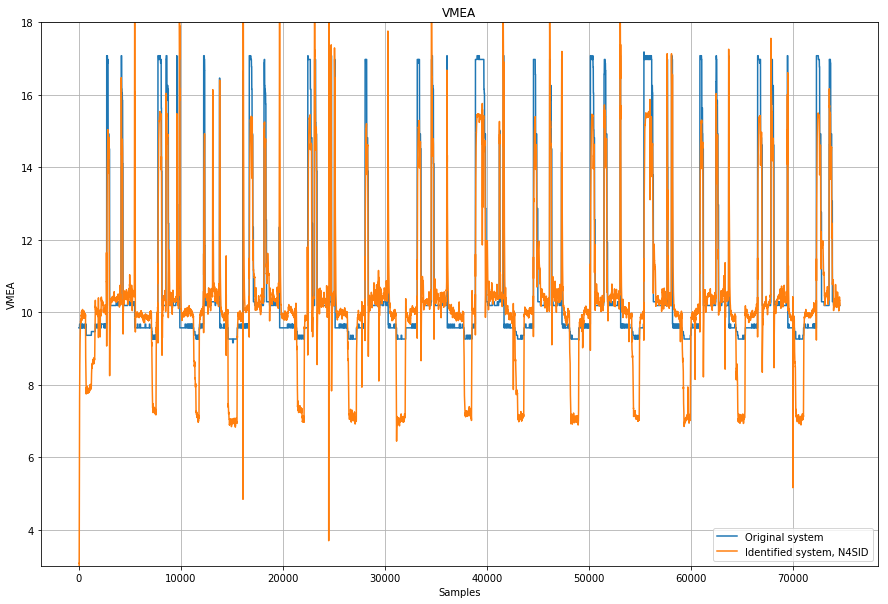

In [55]:
##Selecionando os parâmetros
VBus = (tide_data2.iloc[:,1])
IBus = (tide_data2.iloc[:,2])
ISG2 = (tide_data2.iloc[:,3])
VMEA = (tide_data2.iloc[:,4])
IBDR_out = (tide_data2.iloc[:,9])
VBat1 = (tide_data2.iloc[:,12])


VBus = pd.to_numeric(VBus)
IBus = pd.to_numeric(IBus)
ISG2 = pd.to_numeric(ISG2)
VMEA = pd.to_numeric(VMEA)
IBDR_out = pd.to_numeric(IBDR_out)



#Definindo tamanho da amostra para a identificação
tamanho = len(VBus)
amostras_ident = round(tamanho/15)

##Definindo amostras para identificação
VBus_ident = VBus[1:amostras_ident]
IBus_ident = IBus[1:amostras_ident]
ISG2_ident = ISG2[1:amostras_ident]
VMEA_ident = VMEA[1:amostras_ident]
IBDR_out_ident = IBDR_out[1:amostras_ident]

VBus_ident = pd.to_numeric(VBus_ident)
IBus_ident = pd.to_numeric(IBus_ident)
ISG2_ident = pd.to_numeric(ISG2_ident)
VMEA_ident = pd.to_numeric(VMEA_ident)
IBDR_out_ident = pd.to_numeric(IBDR_out_ident)


#Definindo amotras para para validação
VBus_val = VBus[amostras_ident+1:tamanho]
IBus_val = IBus[amostras_ident+1:tamanho]
ISG2_val = ISG2[amostras_ident+1:tamanho]
VMEA_val = VMEA[amostras_ident+1:tamanho]
IBDR_out_val = IBDR_out[amostras_ident+1:tamanho]


u1_val = pd.concat([IBDR_out_val,ISG2_val,IBus_val,VBus_val],axis=1)
u1_val = u1_val.values
u1_val = u1_val.transpose()

y1_val = VMEA_val.values
y1_val = y1_val.transpose()

##Definindo as Entradas
u1 = pd.concat([IBDR_out_ident,ISG2_ident,IBus_ident,VBus_ident],axis=1)
u1 = u1.values

##Definindo as Saídas
y1 = pd.concat([VMEA_ident],axis=1)
y1 = y1.values

##Método de Identificação
method = 'N4SID'
##Identificação
sys_id=system_identification(y1,u1,method,SS_fixed_order=6)
xid,yid=fsetSIM.SS_lsim_process_form(sys_id.A,sys_id.B,sys_id.C,sys_id.D,u1_val,sys_id.x0)

## Cálculo do erro saída1
y_calc = yid[0].transpose()
y1_val2 = pd.DataFrame(y1_val)
y_calc = pd.DataFrame(y_calc)
dif = (y1_val2-y_calc).values
MRSE_n4sid = (sqrt((sum((dif)**2))/(sum((y1_val)**2))))*100

plt.close("all")
plt.figure(1)
plt.figure(figsize=(15,10))
plt.plot(y1_val)
plt.plot(yid[0])
plt.ylabel("VMEA")
plt.ylim((3,18))
plt.grid()
plt.xlabel("Samples")
plt.title("VMEA")
plt.legend(['Original system','Identified system, '+method])

Kalman filter cannot be calculated


<Figure size 432x288 with 0 Axes>

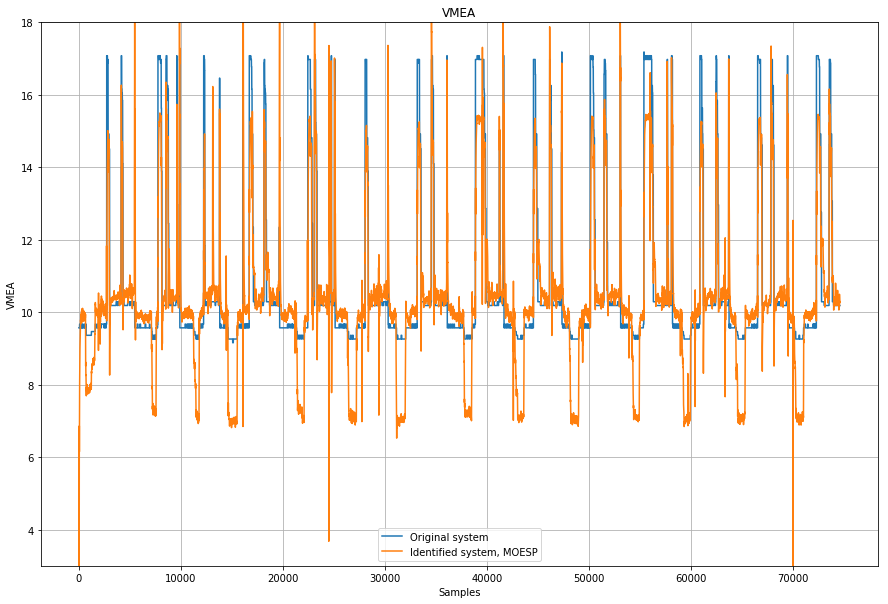

In [56]:
##Método de Identificação
method2 = 'MOESP'
##Identificação
sys_id2=system_identification(y1,u1,method2,SS_fixed_order=6)
xid2,yid2=fsetSIM.SS_lsim_process_form(sys_id2.A,sys_id2.B,sys_id2.C,sys_id2.D,u1_val,sys_id2.x0)

## Cálculo do erro saída1
y_calc = yid2[0].transpose()
y1_val2 = pd.DataFrame(y1_val)
y_calc = pd.DataFrame(y_calc)
dif = (y1_val2-y_calc).values
MRSE_moesp = (sqrt((sum((dif)**2))/(sum((y1_val)**2))))*100

plt.figure(2)
plt.figure(figsize=(15,10))
plt.plot(y1_val)
plt.plot(yid2[0])
plt.ylabel("VMEA")
plt.ylim((3,18))
plt.grid()
plt.xlabel("Samples")
plt.title("VMEA")
plt.legend(['Original system','Identified system, '+method2])

Kalman filter cannot be calculated


<Figure size 432x288 with 0 Axes>

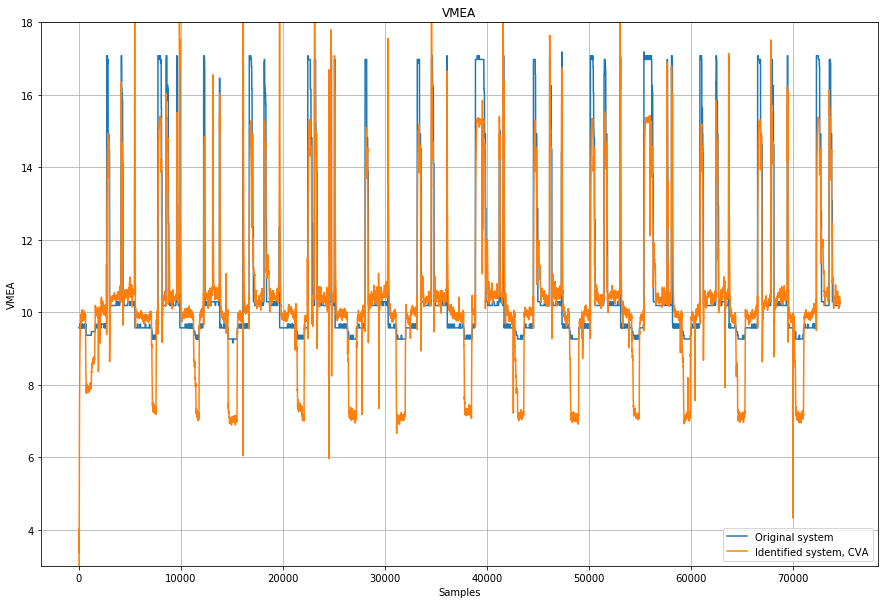

In [57]:
##Método de Identificação
method3 = 'CVA'
##Identificação
sys_id3=system_identification(y1,u1,method3,SS_fixed_order=6)
xid3,yid3=fsetSIM.SS_lsim_process_form(sys_id3.A,sys_id3.B,sys_id3.C,sys_id3.D,u1_val,sys_id3.x0)

## Cálculo do erro
y_calc = yid3.transpose()
y1_val2 = pd.DataFrame(y1_val)
y_calc = pd.DataFrame(y_calc)
dif = (y1_val2-y_calc).values
MRSE_cva = (sqrt((sum((dif)**2))/(sum((y1_val)**2))))*100

plt.figure(3)
plt.figure(figsize=(15,10))
plt.plot(y1_val)
plt.plot(yid3[0])
plt.ylabel("VMEA")
plt.ylim((3,18))
plt.grid()
plt.xlabel("Samples")
plt.title("VMEA")
plt.legend(['Original system','Identified system, '+method3])

MRSE_VMEA = [MRSE_n4sid,MRSE_moesp,MRSE_cva]

In [58]:
MRSE_VMEA

[12.022694409048116, 11.78657309471038, 11.836259773698329]

In [59]:
min(MRSE_VMEA)

11.78657309471038

## Resultado

O modelo que apresentou o menor erro foi o obtido a partir do método MOESP. Como o parâmetro VMEA não era calculado no simulado, adotar este modelo no contexto do simulador pode fornecer mais informações em torno do controle do barramento do satélite.

# Identificação do $V_{Bat1}$


## Passo1: Importação dos Dados

In [60]:
from __future__ import division
from past.utils import old_div

import pandas as pd
import numpy as np
from numpy import long
from numpy import float32
from numpy import int64
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from math import sqrt

#Checking path to access other files
try:
    from SIPPY import *
except ImportError:
    import sys, os
    sys.path.append(os.pardir)
    from SIPPY import *

import control as cnt
from control import matlab
from SIPPY import functionset as fset
from SIPPY import functionsetSIM as fsetSIM

##Indicando o nome do arquivo
file = 'Telemetry.csv'

##Indicando o nome do arquivo
file = 'Telemetry2.csv'

##Importando o arquivo para o Workspace
raw_data = pd.read_csv(file,sep=';');

##Substituindo o valor "NAO PROCESSADO" por NaN
raw_data2 = raw_data.replace(to_replace="NAO PROCESSADO",value=np.nan);

##Removendo as linhas com NaN
tide_data = raw_data2.dropna()

## Removendo o cabeçalho
tide_data2 = tide_data.drop(tide_data.index[[0,1]])

C:\Users\italo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Passo 2: Slecionando as Entradas e Saídas e Fazendo a Identificação

Kalman filter cannot be calculated


<Figure size 432x288 with 0 Axes>

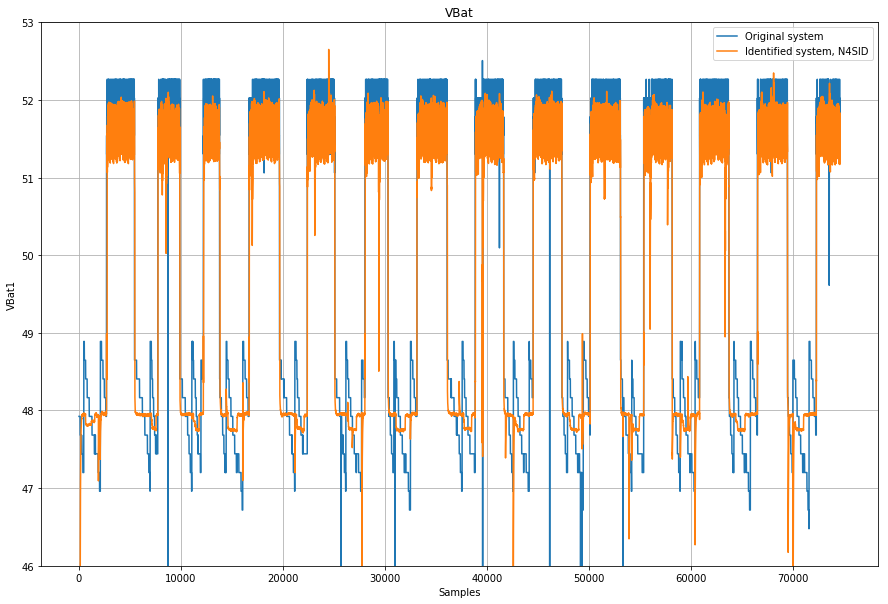

In [61]:
##Selecionando os parâmetros
VBus = (tide_data2.iloc[:,1])
IBat1 = (tide_data2.iloc[:,5])
VBat1 = (tide_data2.iloc[:,12])
ISG1A_to_BDR = (tide_data2.iloc[:,18])


VBus = pd.to_numeric(VBus)
IBat1 = pd.to_numeric(IBat1)
VBat1 = pd.to_numeric(VBat1)
ISG1A_to_BDR = pd.to_numeric(ISG1A_to_BDR)


#Definindo tamanho da amostra para a identificação
tamanho = len(VBus)
amostras_ident = round(tamanho/15)

##Definindo amostras para identificação
IBat1_ident = IBat1[1:amostras_ident]
VBat1_ident = VBat1[1:amostras_ident]
ISG1A_to_BDR_ident = ISG1A_to_BDR[1:amostras_ident]
VBus_ident = VBus[1:amostras_ident]

IBat1_ident = pd.to_numeric(IBat1_ident)
VBat1_ident = pd.to_numeric(VBat1_ident)
ISG1A_to_BDR_ident = pd.to_numeric(ISG1A_to_BDR_ident)
VBus_ident = pd.to_numeric(VBus_ident)


#Definindo amotras para para validação
IBat1_val = IBat1[amostras_ident+1:tamanho]
VBat1_val = VBat1[amostras_ident+1:tamanho]
ISG1A_to_BDR_val = ISG1A_to_BDR[amostras_ident+1:tamanho]
VBus_val = VBus[amostras_ident+1:tamanho]


u1_val = pd.concat([IBat1_val,ISG1A_to_BDR_val,VBus_val],axis=1)
u1_val = u1_val.values
u1_val = u1_val.transpose()

y1_val = VBat1_val.values
y1_val = y1_val.transpose()

##Definindo as Entradas
u1 = pd.concat([IBat1_ident,ISG1A_to_BDR_ident,VBus_ident],axis=1)
u1 = u1.values

##Definindo as Saídas
y1 = pd.concat([VBat1_ident],axis=1)
y1 = y1.values

##Método de Identificação
method = 'N4SID'
##Identificação
sys_id=system_identification(y1,u1,method,SS_fixed_order=2)
xid,yid=fsetSIM.SS_lsim_process_form(sys_id.A,sys_id.B,sys_id.C,sys_id.D,u1_val,sys_id.x0)

## Cálculo do erro saída1
y_calc = yid[0].transpose()
y1_val2 = pd.DataFrame(y1_val)
y_calc = pd.DataFrame(y_calc)
dif = (y1_val2-y_calc).values
MRSE_n4sid = (sqrt((sum((dif)**2))/(sum((y1_val)**2))))*100

plt.close("all")
plt.figure(1)
plt.figure(figsize=(15,10))
plt.plot(y1_val)
plt.plot(yid[0])
plt.ylabel("VBat1")
plt.ylim((46,53))
plt.grid()
plt.xlabel("Samples")
plt.title("VBat")
plt.legend(['Original system','Identified system, '+method])

Kalman filter cannot be calculated


<Figure size 432x288 with 0 Axes>

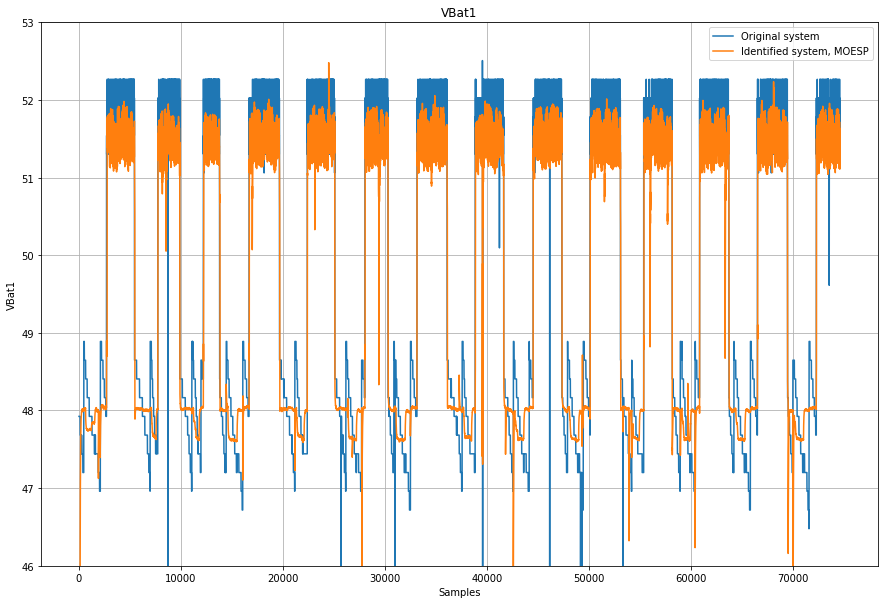

In [62]:
##Método de Identificação
method2 = 'MOESP'
##Identificação
sys_id2=system_identification(y1,u1,method2,SS_fixed_order=2)
xid2,yid2=fsetSIM.SS_lsim_process_form(sys_id2.A,sys_id2.B,sys_id2.C,sys_id2.D,u1_val,sys_id2.x0)

## Cálculo do erro saída1
y_calc = yid2[0].transpose()
y1_val2 = pd.DataFrame(y1_val)
y_calc = pd.DataFrame(y_calc)
dif = (y1_val2-y_calc).values
MRSE_moesp = (sqrt((sum((dif)**2))/(sum((y1_val)**2))))*100

plt.figure(2)
plt.figure(figsize=(15,10))
plt.plot(y1_val)
plt.plot(yid2[0])
plt.ylabel("VBat1")
plt.ylim((46,53))
plt.grid()
plt.xlabel("Samples")
plt.title("VBat1")
plt.legend(['Original system','Identified system, '+method2])

Kalman filter cannot be calculated


<Figure size 432x288 with 0 Axes>

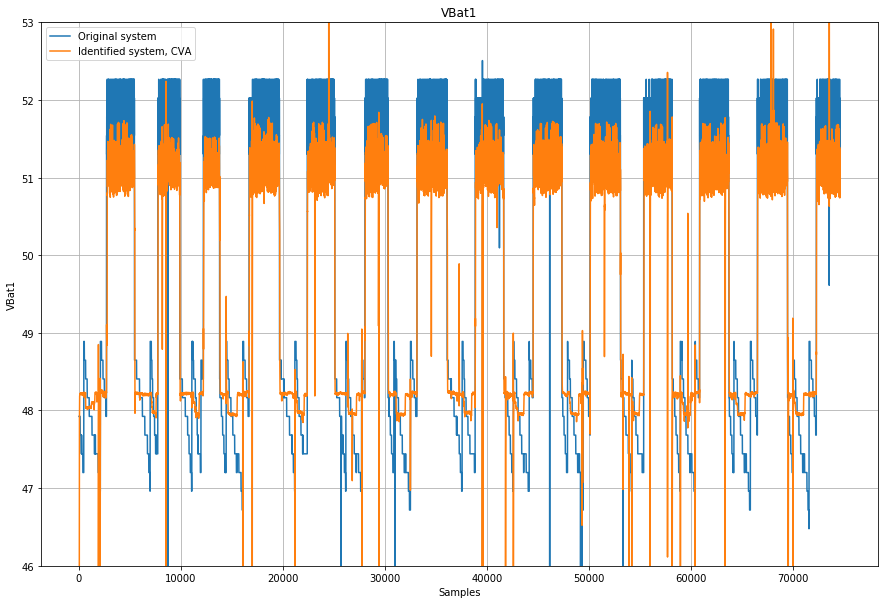

In [63]:
##Método de Identificação
method3 = 'CVA'
##Identificação
sys_id3=system_identification(y1,u1,method3,SS_fixed_order=2)
xid3,yid3=fsetSIM.SS_lsim_process_form(sys_id3.A,sys_id3.B,sys_id3.C,sys_id3.D,u1_val,sys_id3.x0)

## Cálculo do erro
y_calc = yid3.transpose()
y1_val2 = pd.DataFrame(y1_val)
y_calc = pd.DataFrame(y_calc)
dif = (y1_val2-y_calc).values
MRSE_cva = (sqrt((sum((dif)**2))/(sum((y1_val)**2))))*100

plt.figure(3)
plt.figure(figsize=(15,10))
plt.plot(y1_val)
plt.plot(yid3[0])
plt.ylabel("VBat1")
plt.ylim((46,53))
plt.grid()
plt.xlabel("Samples")
plt.title("VBat1")
plt.legend(['Original system','Identified system, '+method3])

MRSE_VBat1 = [MRSE_n4sid,MRSE_moesp,MRSE_cva]

In [64]:
MRSE_VBat1

[2.193767371256744, 2.160608704529906, 2.0245089814801283]

In [65]:
min(MRSE_VBat1)

2.0245089814801283

## Resultado

A melhor representação da tensão da bateria $V_{BAT1}$ também se dá a partir do modelo identificado a partir do método CVA.

# Identificação do $I_{Bat1}$ e $T_{Bat1}$ (Temperatura Bateria)

Foi incluída a temperatura da bateria para verificar se as técnicas conseguiriam obter o modelos deste parâmtro também.

## Passo1: Importação dos Dados

In [66]:
from __future__ import division
from past.utils import old_div

import pandas as pd
import numpy as np
from numpy import long
from numpy import float32
from numpy import int64
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from math import sqrt

#Checking path to access other files
try:
    from SIPPY import *
except ImportError:
    import sys, os
    sys.path.append(os.pardir)
    from SIPPY import *

import control as cnt
from control import matlab
from SIPPY import functionset as fset
from SIPPY import functionsetSIM as fsetSIM

##Indicando o nome do arquivo
file = 'Telemetry2.csv'

##Importando o arquivo para o Workspace
raw_data = pd.read_csv(file,sep=';');

##Substituindo o valor "NAO PROCESSADO" por NaN
raw_data2 = raw_data.replace(to_replace="NAO PROCESSADO",value=np.nan);


##Removendo as linhas com NaN
tide_data = raw_data2.dropna()

## Removendo o cabeçalho
tide_data2 = tide_data.drop(tide_data.index[[0,1]])

##Apagando Raw_data da memória


##Selecionando os parâmetros
IBus = (tide_data2.iloc[:,2])
IBat1 = (tide_data2.iloc[:,5])
IBDR1_in = (tide_data2.iloc[:,7])
ISG1A = (tide_data2.iloc[:,10])
TBat1 = (tide_data2.iloc[:,16])
ISG1A_to_BDR = (tide_data2.iloc[:,18])


IBus = pd.to_numeric(IBus)
IBat1 = pd.to_numeric(IBat1)
IBDR1_in = pd.to_numeric(IBDR1_in)
ISG1A = pd.to_numeric(ISG1A)
TBat1 = pd.to_numeric(TBat1)
ISG1A_to_BDR = pd.to_numeric(ISG1A_to_BDR)

C:\Users\italo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Kalman filter cannot be calculated


<Figure size 432x288 with 0 Axes>

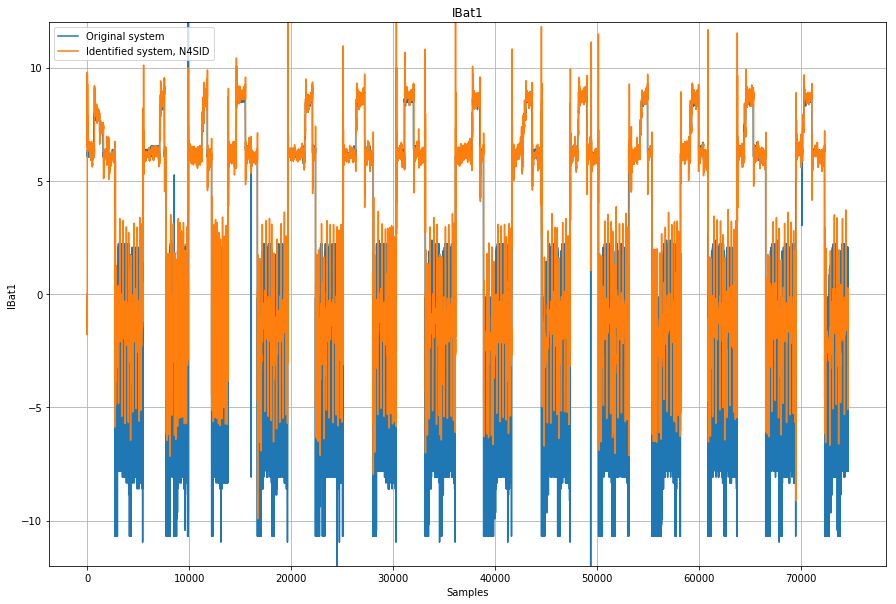

In [67]:
#Definindo tamanho da amostra para a identificação
tamanho = len(IBus)
amostras_ident = round(tamanho/15)

##Definindo amostras para identificação
IBat1_ident = IBat1[1:amostras_ident]
ISG1A_ident = ISG1A[1:amostras_ident]
ISG1A_to_BDR_ident = ISG1A_to_BDR[1:amostras_ident]
TBat1_ident = TBat1[1:amostras_ident]
IBus_ident = IBus[1:amostras_ident]
IBDR1_in_ident = IBDR1_in[1:amostras_ident]

IBat1_ident = pd.to_numeric(IBat1_ident)
ISG1A_ident = pd.to_numeric(ISG1A_ident)
ISG1A_to_BDR_ident = pd.to_numeric(ISG1A_to_BDR_ident)
TBat1_ident = pd.to_numeric(TBat1_ident)
IBus_ident = pd.to_numeric(IBus_ident)
IBDR1_in_ident = pd.to_numeric(IBDR1_in_ident)

#Definindo amotras para para validação
IBat1_val = IBat1[amostras_ident+1:tamanho]
ISG1A_val = ISG1A[amostras_ident+1:tamanho]
ISG1A_to_BDR_val = ISG1A_to_BDR[amostras_ident+1:tamanho]
TBat1_val = TBat1[amostras_ident+1:tamanho]
IBus_val = IBus[amostras_ident+1:tamanho]
IBDR1_in_val = IBDR1_in[amostras_ident+1:tamanho]


u1_val = pd.concat([ISG1A_val,IBDR1_in_val,IBus_val,ISG1A_to_BDR_val],axis=1)
u1_val = u1_val.values
u1_val = u1_val.transpose()

y1_val = IBat1_val.values
y1_val = y1_val.transpose()

y2_val = TBat1_val.values
y2_val = y2_val.transpose()

##Definindo as Entradas
u1 = pd.concat([ISG1A_ident,IBDR1_in_ident,IBus_ident,ISG1A_to_BDR_ident],axis=1)
u1 = u1.values

#USim = fset.PRBS_seq(u1)

##Definindo as Saídas
y1 = pd.concat([IBat1_ident,TBat1_ident],axis=1)
y1 = y1.values

#Y = 

##Método de Identificação
method = 'N4SID'
##Identificação
sys_id=system_identification(y1,u1,method,SS_fixed_order=10)
xid,yid=fsetSIM.SS_lsim_process_form(sys_id.A,sys_id.B,sys_id.C,sys_id.D,u1_val,sys_id.x0)

## Cálculo do erro saída1
y_calc = yid[0].transpose()
y1_val2 = pd.DataFrame(y1_val)
y_calc = pd.DataFrame(y_calc)
dif = (y1_val2-y_calc).values
MRSE_n4sid_y1 = (sqrt((sum((dif)**2))/(sum((y1_val)**2))))*100

y_calc = yid[1].transpose()
y1_val2 = pd.DataFrame(y2_val)
y_calc = pd.DataFrame(y_calc)
dif = (y1_val2-y_calc).values
MRSE_n4sid_y2 = (sqrt((sum((dif)**2))/(sum((y1_val)**2))))*100


plt.close("all")
plt.figure(1)
plt.figure(figsize=(15,10))
plt.plot(y1_val)
plt.plot(yid[0])
plt.ylabel("IBat1")
plt.ylim((-12,12))
plt.grid()
plt.xlabel("Samples")
plt.title("IBat1")
plt.legend(['Original system','Identified system, '+method])

<Figure size 432x288 with 0 Axes>

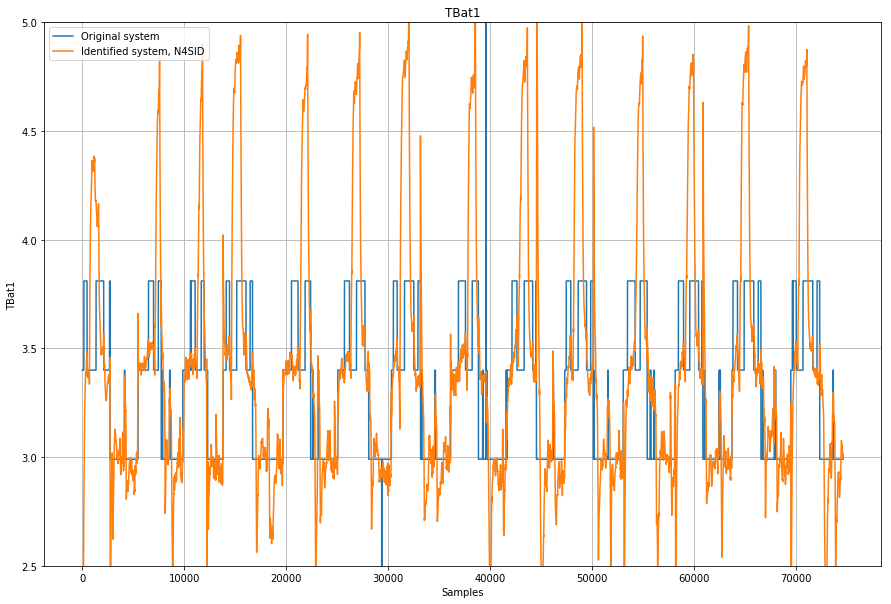

In [68]:
plt.figure(2)
plt.figure(figsize=(15,10))
plt.plot(y2_val)
plt.plot(yid[1])
plt.ylabel("TBat1")
plt.ylim((2.5,5))
plt.grid()
plt.xlabel("Samples")
plt.title("TBat1")
plt.legend(['Original system','Identified system, '+method])

Kalman filter cannot be calculated


<Figure size 432x288 with 0 Axes>

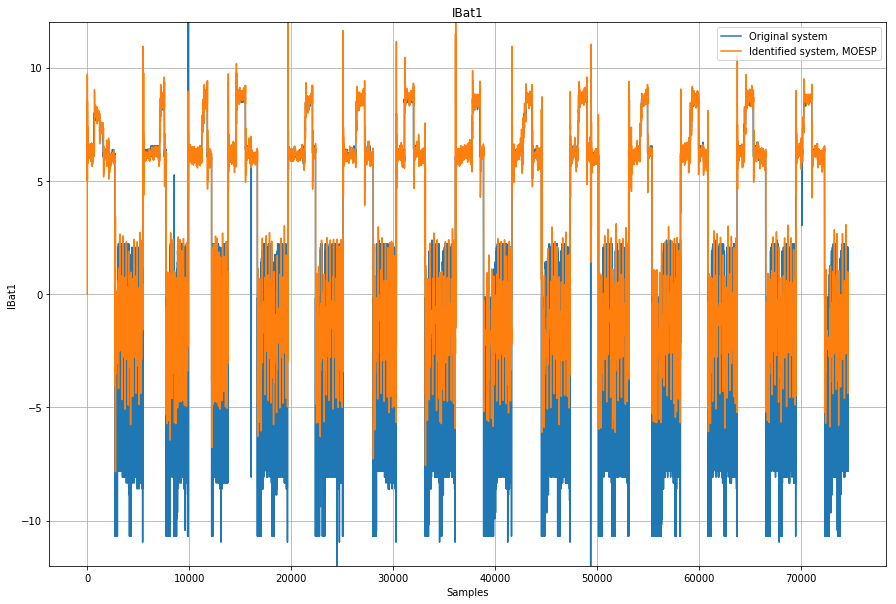

In [69]:
##Método de Identificação
method2 = 'MOESP'
##Identificação
sys_id2=system_identification(y1,u1,method2,SS_fixed_order=10)
xid2,yid2=fsetSIM.SS_lsim_process_form(sys_id2.A,sys_id2.B,sys_id2.C,sys_id2.D,u1_val,sys_id2.x0)

## Cálculo do erro saída1
y_calc = yid2[0].transpose()
y1_val2 = pd.DataFrame(y1_val)
y_calc = pd.DataFrame(y_calc)
dif = (y1_val2-y_calc).values
MRSE_moesp_y1 = (sqrt((sum((dif)**2))/(sum((y1_val)**2))))*100

y_calc = yid2[1].transpose()
y1_val2 = pd.DataFrame(y2_val)
y_calc = pd.DataFrame(y_calc)
dif = (y1_val2-y_calc).values
MRSE_moesp_y2 = (sqrt((sum((dif)**2))/(sum((y1_val)**2))))*100

plt.figure(3)
plt.figure(figsize=(15,10))
plt.plot(y1_val)
plt.plot(yid2[0])
plt.ylabel("IBat1")
plt.ylim((-12,12))
plt.grid()
plt.xlabel("Samples")
plt.title("IBat1")
plt.legend(['Original system','Identified system, '+method2])

<Figure size 432x288 with 0 Axes>

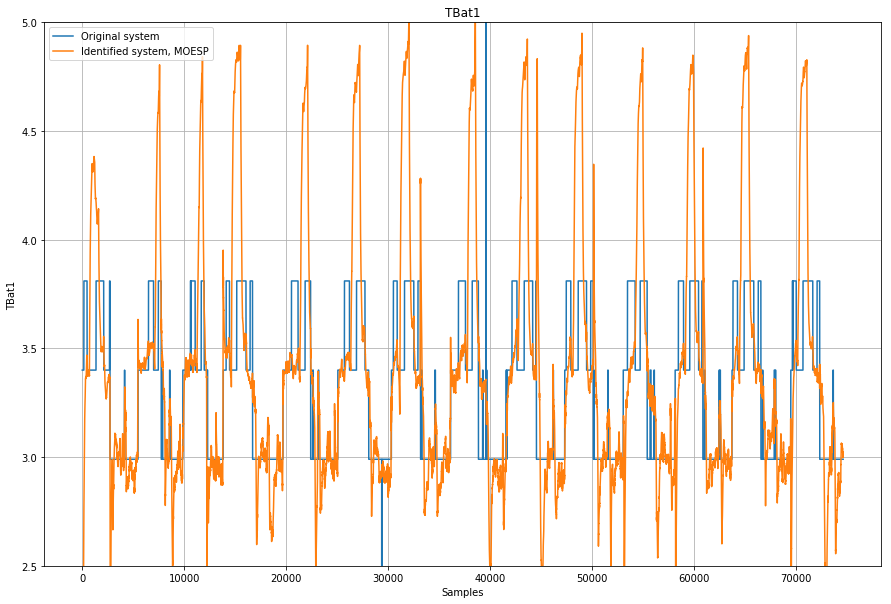

In [70]:
plt.figure(4)
plt.figure(figsize=(15,10))
plt.plot(y2_val)
plt.plot(yid2[1])
plt.ylabel("TBat1")
plt.ylim((2.5,5))
plt.grid()
plt.xlabel("Samples")
plt.title("TBat1")
plt.legend(['Original system','Identified system, '+method2])

Kalman filter cannot be calculated


<Figure size 432x288 with 0 Axes>

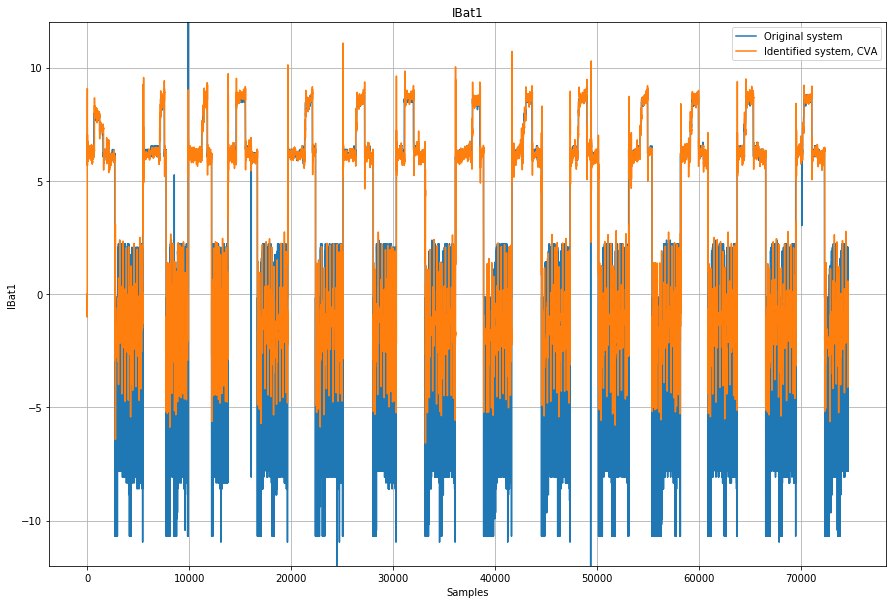

In [71]:
##Método de Identificação
method3 = 'CVA'
##Identificação
sys_id3=system_identification(y1,u1,method3,SS_fixed_order=10)
xid3,yid3=fsetSIM.SS_lsim_process_form(sys_id3.A,sys_id3.B,sys_id3.C,sys_id3.D,u1_val,sys_id3.x0)

## Cálculo do erro saída1
y_calc = yid3[0].transpose()
y1_val2 = pd.DataFrame(y1_val)
y_calc = pd.DataFrame(y_calc)
dif = (y1_val2-y_calc).values
MRSE_CVA_y1 = (sqrt((sum((dif)**2))/(sum((y1_val)**2))))*100

y_calc = yid3[1].transpose()
y1_val2 = pd.DataFrame(y2_val)
y_calc = pd.DataFrame(y_calc)
dif = (y1_val2-y_calc).values
MRSE_CVA_y2 = (sqrt((sum((dif)**2))/(sum((y1_val)**2))))*100

plt.figure(5)
plt.figure(figsize=(15,10))
plt.plot(y1_val)
plt.plot(yid3[0])
plt.ylabel("IBat1")
plt.ylim((-12,12))
plt.grid()
plt.xlabel("Samples")
plt.title("IBat1")
plt.legend(['Original system','Identified system, '+method3])

<Figure size 432x288 with 0 Axes>

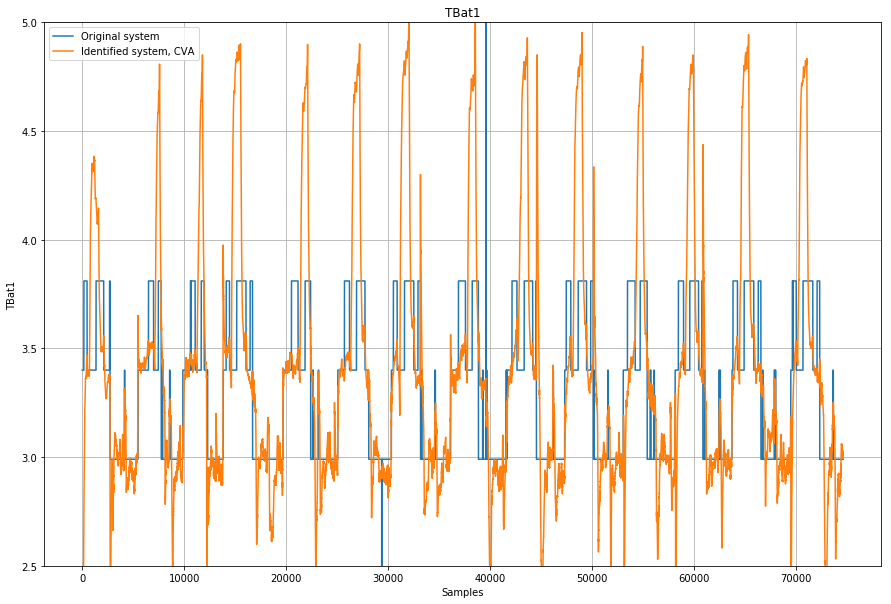

In [72]:
plt.figure(6)
plt.figure(figsize=(15,10))
plt.plot(y2_val)
plt.plot(yid3[1])
plt.ylabel("TBat1")
plt.ylim((2.5,5))
plt.grid()
plt.xlabel("Samples")
plt.title("TBat1")
plt.legend(['Original system','Identified system, '+method3])

MRSE_IBAT1 = [MRSE_n4sid_y1,MRSE_moesp_y1,MRSE_CVA_y1]
MRSE_TBAT1 = [MRSE_n4sid_y2,MRSE_moesp_y2,MRSE_CVA_y2]

In [73]:
MRSE_IBAT1

[54.00728555371077, 53.662914001405895, 53.74988090291251]

In [74]:
min(MRSE_IBAT1)

53.662914001405895

In [75]:
MRSE_TBAT1

[15.57632197825995, 15.527239534527196, 15.531900473736258]

In [76]:
min(MRSE_TBAT1)

15.527239534527196

## Resultado

Para $I_{BAT1}$ apesar de o comportamento da telemetria estar visualmente correto, nenhuma técnica de identificação gerou um modelo com erro menor que $53\%$.

No caso da temperatura, $T_{BAT1}$, a identificação foi considerada, visualmente, ruim, uma vez que o comportamento da telemetria não está sendo satisfeito. É possível observar o modelo identificado não obedece a forma 'quadrada' da telemtria.

# Conclusões

A técnica de identificação se mostrou bastante promissora na obtenção de modelos mais fieis para emprego no simulador operacional. No entanto, devido ao papel fundamental que o simulador desempenha durante a operação do satélite, são válidas as tentativas para diminuir ainda mais o erro.

Assim, é possível aplicar ténicas mais simples em conjunto com a identicação, como por exmeplo teoria de controle. Ou ainda técnicas que envolvam machine learning para estimação.



# Referências
[1] EUROPEAN COOPERATION FOR SPACE STANDARDIZATION (ECSS). Space engineering: System modelling and simulation. ESTEC, P.O. Box 299, 2200 AG Noordwijk - The Netherlands, apr. 2010. ECSS-E-TM-10-21A. Disponível em:  <http://www.ecss.nl/>. Acesso em: 16 set. 2018

[2] AMBROSIO, A. M.; CARDOSO, P. E.; BIANCHI NETO, J. Brazilian satellite simulators: previous solutions trade-off and new perspectives for the CBERS program. In: INTERNATIONAL CONFERENCE ON SPACE OPERATIONS WILL BE HOSTED BY THE, 9TH., 2006, Rome, Italy. **Proceedings...** 2006. p. 7. CD-ROM. (INPE-14068-PRE/9237).

[3] Souza, M. L. O. and Trivelato, G. C. (2003). Simulators and simulations: their characteristics  and applications to the simulation and control of aerospace vehicles, SAE Technical Paper, SAE International.

[4] Ambrosio, A. M. and Branco, M. S. A. (2017).  Cbers 3&4 satellite simulator system requirements specification, Technical report, INPE

[5] Jamaludin, I. W., Wahab, N. A., Khalid, N. S., Sahlan, S., Ibrahim, Z., & Rahmat, M. F. (2013). N4SID and MOESP subspace identification methods. 2013 IEEE 9th International Colloquium on Signal Processing and Its Applications. doi:10.1109/cspa.2013.6530030